https://webcache.googleusercontent.com/search?q=cache:https://towardsdatascience.com/introduction-to-arima-for-time-series-forecasting-ee0bc285807a

In [1]:
import pandas as pd
df = pd.read_csv('rainfall.csv')
df

,date,rainfall
0,01-01-2010,2.9
1,02-01-2010,10.2
2,03-01-2010,0.9
3,04-01-2010,48.6
4,05-01-2010,9.6
...,...,...
3769,27-04-2020,0.0
3770,28-04-2020,8.4
3771,29-04-2020,5.4
3772,30-04-2020,3.2


<Axes: xlabel='date'>

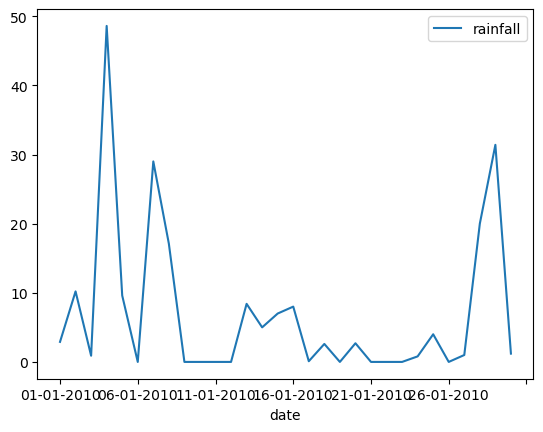

In [2]:
import matplotlib.pyplot as plt# First 30 days
first_30 = df[:30]
first_30.plot.line(x='date', y='rainfall')

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

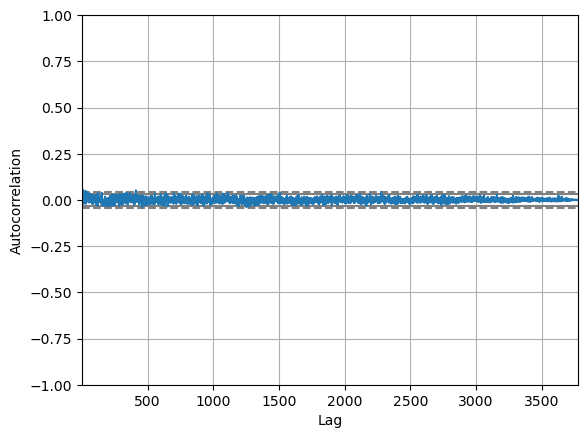

In [12]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(first_30['rainfall'])

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

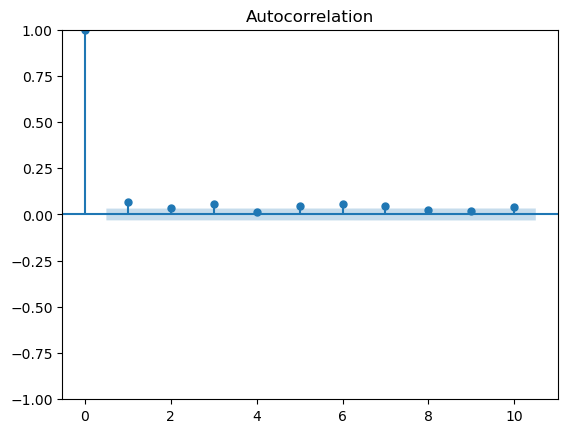

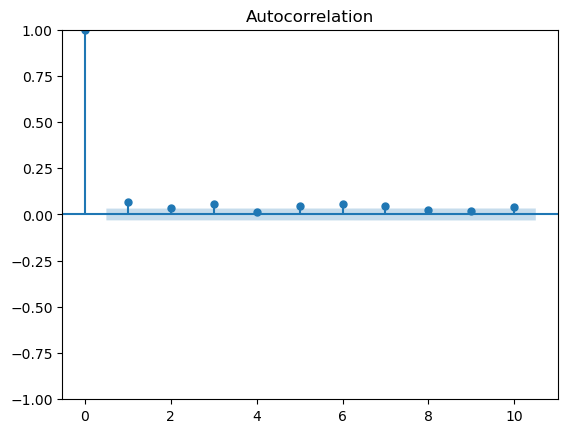

In [27]:
plot_acf(df['rainfall'].dropna(),lags=10)

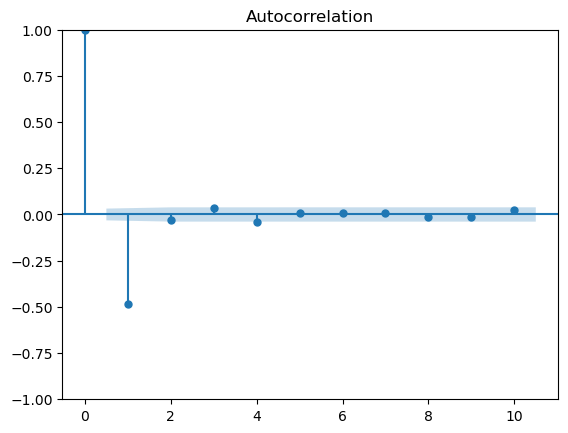

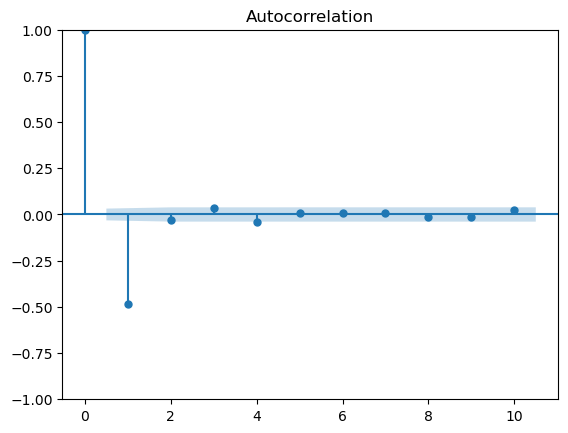

In [26]:
df['firstdiff']=df['rainfall'].diff()

plot_acf(df['firstdiff'].dropna(),lags=10)

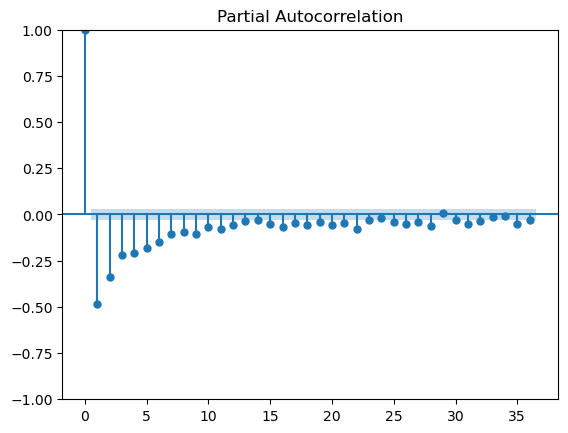

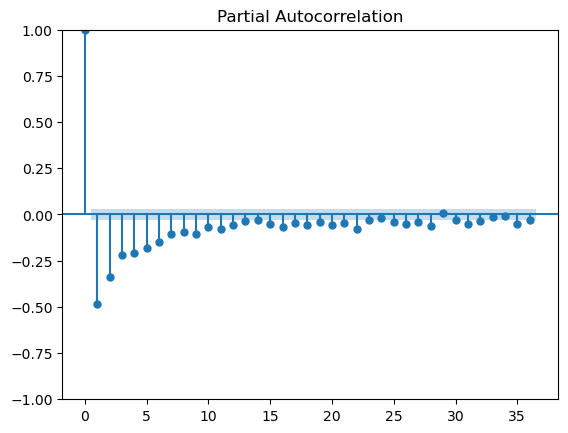

In [28]:
plot_pacf(df['firstdiff'].dropna())

In [31]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['rainfall'].diff().dropna())

(-18.951057622889618,
 0.0,
 30,
 3742,
 {'1%': -3.432098741718118,
  '5%': -2.8623126975788264,
  '10%': -2.5671813176558236},
 31985.730296858652)

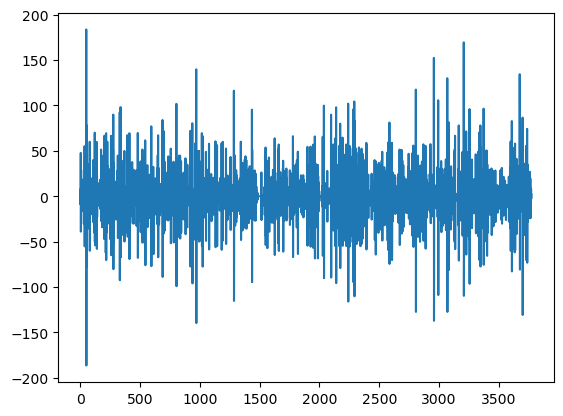

In [34]:
plt.plot(df['rainfall'].diff())

In [75]:
data = df[:365]

In [97]:
train= data['rainfall'][:round(len(data)*(70/100))]
test= data['rainfall'][round(len(data)*70//100):]
print(train.tail()) # Just to check where it ends
train.info()
print(test.tail()) 

250     1.0
251    30.0
252     0.4
253     0.0
254     0.4
Name: rainfall, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 255 entries, 0 to 254
Series name: rainfall
Non-Null Count  Dtype  
--------------  -----  
255 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB
360    20.9
361    24.7
362     5.3
363     6.8
364     0.8
Name: rainfall, dtype: float64


In [37]:
from statsmodels.tsa.arima.model import ARIMA 

In [123]:
model = ARIMA(data['rainfall'],order=(5,1,0)) # Parameters: p, d, q
model_fit = model.fit()
prediction = model_fit.predict(start=data.index[0],end=data.index[-1])
data['arimaPred'] = prediction
print(df.tail())

            date  rainfall  firstdiff  arimaPred
3769  27-04-2020       0.0       -5.8        NaN
3770  28-04-2020       8.4        8.4        NaN
3771  29-04-2020       5.4       -3.0        NaN
3772  30-04-2020       3.2       -2.2        NaN
3773  01-05-2020       5.2        2.0        NaN


/tmp/ipykernel_24625/991122731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['arimaPred'] = prediction


In [43]:
import seaborn as sns

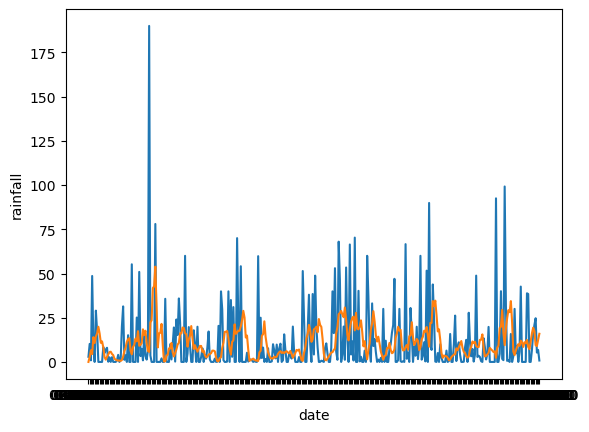

In [124]:
sns.lineplot(data=data,x='date',y='rainfall')
sns.lineplot(data=data,x='date',y='arimaPred')
plt.show()

In [126]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(data['rainfall'], prediction))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 21.084


In [114]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [132]:
model = SARIMAX(data['rainfall'],order=(5,1,0),seasonal_order=(5,1,0,6)) # Parameters: p, d, q
model_fit = model.fit()
prediction = model_fit.predict(start=data.index[0],end=data.index[-1])
data['sarimaPred'] = prediction
print(df.tail())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57971D+00    |proj g|=  2.51351D-01


 This problem is unconstrained.



At iterate    5    f=  4.50295D+00    |proj g|=  1.27271D-02

At iterate   10    f=  4.48835D+00    |proj g|=  5.47568D-02

At iterate   15    f=  4.45878D+00    |proj g|=  2.08934D-02

At iterate   20    f=  4.45835D+00    |proj g|=  8.42260D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     22     27      1     0     0   7.497D-06   4.458D+00
  F =   4.4583461734601055     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
            date  rainfall  firstdiff  arimaPred
3769  27-04-2020       0.0       -5.8        NaN
3770  28-04-2020       8.4        8.4        NaN
3771  29-04-2020       5.4  

/tmp/ipykernel_24625/3531424125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sarimaPred'] = prediction


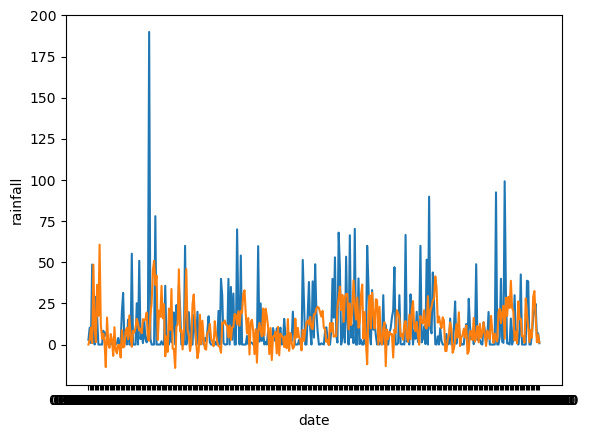

In [133]:
sns.lineplot(data=data,x='date',y='rainfall')
sns.lineplot(data=data,x='date',y='sarimaPred')
plt.show()

In [135]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(data['rainfall'], prediction))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 22.779
